In [ ]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=fe115434726a6e1618cf45e321ed4fa8f2a9810e54f81906804351bec6564643
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
!pip install paddlepaddle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00


[2024/08/09 07:22:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

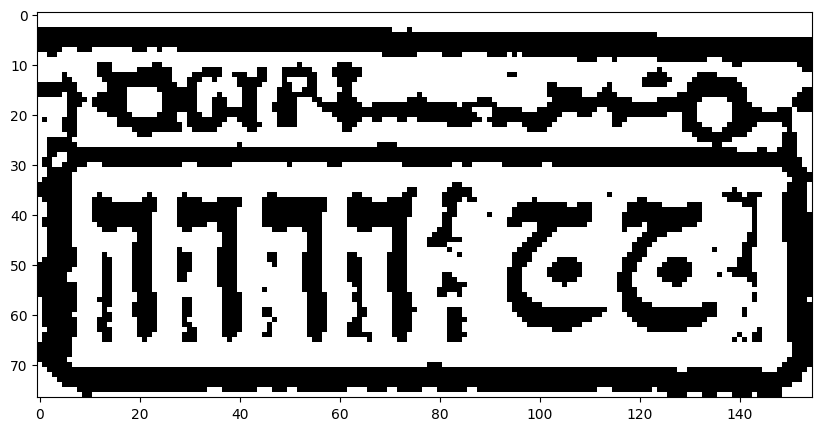

In [ ]:
# Enhanced image processing for car plate recognition using PaddleOCR with improved image quality adjustments

import paddleocr
import matplotlib.pyplot as plt
import cv2

# Define the path to the image
image_path = "/content/drive/MyDrive/Colab Notebooks/Smart_Garage_System/Models( Production ) /cropped_plates/0220_plate.jpg"

# Load the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Convert image to grayscale for better OCR performance
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance image quality by applying Gaussian Blur and Adaptive Thresholding
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
enhanced_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Initialize PaddleOCR for Arabic language
ocr_model = paddleocr.PaddleOCR(lang='ar')

# Perform OCR using PaddleOCR on the enhanced image
results = ocr_model.ocr(image_path, cls=True)

# Print each line of the OCR results in the specified format
for line in results:
    bounding_box = line[0]
    text = line[1][0]
    confidence = line[1][1]
    formatted_bounding_box = '\n'.join(['[' + ', '.join(map(str, point)) + ']' for point in bounding_box])
    formatted_result = f"[[{formatted_bounding_box}],\n('{text}', {confidence})]"
    print(formatted_result)

# Display the output image with OCR results and bounding boxes
plt.figure(figsize=(10,10))
output_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)
for line in results:
    if line[0] and len(line[0]) > 2:  # Check if bounding box coordinates are available and line[0] is not None
        top_left = tuple([int(val) for val in line[0][0] if isinstance(val, (int, float, str))])
        bottom_right = tuple([int(val) for val in line[0][2] if isinstance(val, (int, float, str))])
        output_image = cv2.rectangle(output_image, top_left, bottom_right, (0, 255, 0), 2)
plt.imshow(output_image)
plt.show()

In [ ]:
inner_results = results[0]
inner_results
for res in inner_results:
    print(res[1][0])

print(' '.join([res[1][0] for res in inner_results]))


٦٦٦٦
جج
٦٦٦٦ جج


In [ ]:

# Separate strings and their confidences into different lists
texts = []
confidences = []
for res in inner_results:
  texts.append(res[1][0])
  confidences.append(res[1][1])

# Print the separated lists
print("Texts:", texts)
print("Confidences:", confidences)


Texts: ['٦٦٦٦', 'جج']
Confidences: [0.9955241680145264, 0.9635866284370422]


In [ ]:
separated_texts = []
for text in texts:
  separated_text = ' '.join(text)  # Separate each character with a space
  separated_texts.append(separated_text)

print("Separated Texts:", separated_texts)  # Print the list with separated characters


Separated Texts: ['٦ ٦ ٦ ٦', 'ج ج']
